In [1]:
import pandas as pd 
import numpy as np

In [2]:
df = pd.DataFrame({'x': [0.9,4.11,4.82,8.53,8.9], 'y': [1.91,1.84,4.47,6.38,3.92]})

In [3]:
df 

,x,y
0,0.90,1.91
1,4.11,1.84
2,4.82,4.47
3,8.53,6.38
4,8.90,3.92


<AxesSubplot:xlabel='x', ylabel='y'>

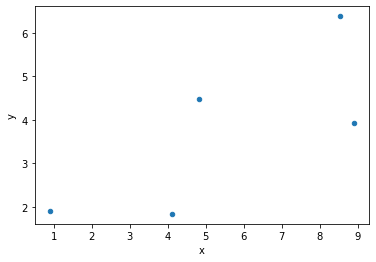

In [4]:
df.plot(x='x',y='y', kind='scatter') 

In [8]:
from matplotlib import pyplot as plt

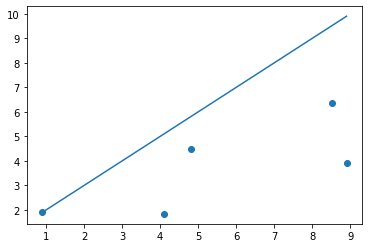

In [9]:
plt.scatter(df['x'], df['y']) 
plt.plot(df['x'], df['y_pred']) 

# Наш алгоритм численный метод для абсолютных отклонений

In [15]:
# изначальные значения
m,b = 1,1 
#Глубина шага нашего поиска
n = 100
#это наш бернинг рейт
nu = 0.05

#обнуляю датасет
df = df[['x','y']].copy()
df['y_pred'] = df['x'] * m + b

for i in range(n):
# здесь важно поместить формулы m = это то как изменяется наша линия по отношению к оси x (вращение)
# а также b это то как она приближается или отдаляется
# м - зависит от количества фичей
    df['m_change'] = df['x'] * np.sign(df['y'] - df['y_pred'])
    df['b_change'] = np.sign(df['y'] - df['y_pred'])
    
 # здесь ищем c помощью бернинг рейта наше значение m и b
    m = m + nu * df['m_change'].mean()
    b = b + nu * df['b_change'].mean()
    
# наш предикт
    df['y_pred'] = df['x'] * m + b
    
# вычисляем ошибку   
    df['err_abs'] = np.abs(df['x'] - df['y_pred'])
    print(df['err_abs'].mean())
    
    

0.7144232000000005
2.028846400000001
1.9597056000000002
1.890564800000001
1.821424000000001
1.7522832000000015
1.6831424000000013
1.6140016000000017
1.5448608000000017
1.475720000000002
1.4065792000000017
1.3374384000000021
1.2682976000000024
2.0798520000000025
2.010711200000003
1.9415704000000027
1.8724296000000027
1.803288800000003
1.7341480000000034
1.6650072000000038
1.5958664000000033
1.5267256000000038
1.457584800000004
1.388444000000004
1.319303200000004
1.2501624000000044
2.0617168000000046
1.9925760000000046
1.9234352000000043
1.8542944000000048
1.785153600000005
1.716012800000005
1.6468720000000054
1.5777312000000054
1.5085904000000057
1.4394496000000059
1.3703088000000063
1.3011680000000063
1.232027200000006
2.0435816000000067
1.9744408000000067
1.9053000000000069
1.8361592000000073
1.767018400000007
1.6978776000000066
1.6287368000000075
1.5595960000000075
1.4904552000000078
1.4213144000000077
1.352173600000008
1.2830328000000084
1.2138920000000084
2.1291024000000087
2.05996

0.5109999999999965 1.4400000000000004


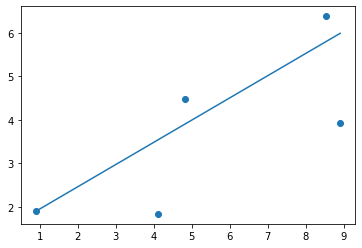

In [18]:
plt.scatter(df['x'], df['y']) 
plt.plot(df['x'], df['y_pred']) 
print(m,b)

In [19]:
df 

,x,y,y_pred,m_change,b_change,err_abs
0,0.90,1.91,1.89990,-0.90,-1.0,0.99990
1,4.11,1.84,3.54021,-4.11,-1.0,0.56979
2,4.82,4.47,3.90302,4.82,1.0,0.91698
3,8.53,6.38,5.79883,8.53,1.0,2.73117
4,8.90,3.92,5.98790,-8.90,-1.0,2.91210


In [24]:
df['x0'] = 1

## Модель

In [39]:
from sklearn.linear_model import SGDRegressor

In [40]:
gd = SGDRegressor()

In [43]:
gd.fit(df[['x']], df['y']) 

SGDRegressor()

In [45]:
gd.coef_

array([0.53115647])

In [47]:
gd.intercept_
theta

0    0.432780
1    1.344486
dtype: float64

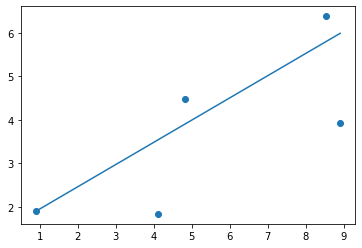

In [48]:
df['gd_pred'] = gd.predict(df[['x']]) 

plt.scatter(df['x'], df['y']) 
plt.plot(df['x'], df['y_pred'])

# Аналитическое решение используются квадраты

In [30]:
# на вход необходимо паавать 2 значения
XT= df[['x', 'x0']].T
XTX=XT@df[['x','x0']]
inv=np.linalg.pinv(XTX)
theta=(inv@XT)@df['y']
print(theta)

0    0.432780
1    1.344486
dtype: float64


In [31]:
from sklearn.linear_model import LinearRegression

In [33]:
model = LinearRegression()

In [35]:
# важноставить две скобки потому что так мы создаем датафрейм
model.fit(df[['x']],df[['y']])

LinearRegression()

In [37]:
# m  коэфициенты 
model.coef_

array([[0.4327796]])

In [38]:
# b - пересечение с y
model.intercept_

array([1.34448561])